<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Cat or Dog - Version CV2
</div>

<div style="display: flex; background-color: blue;" >

# 1.Contexte du projet
</div>

Dans ce projet, vous apprendrez les bases des CNN, leur structure, leurs composants et leur fonctionnement, et vous apprendrez pratiquement comment résoudre une tâche d'apprentissage en profondeur de classification d'images, former , et testez un réseau de neurones avec Tensorflow à l'aide d'images.

- Mettez en place un système de veille
- Import the Dataset and Preprocess the Data
- Create and Train the Model
- Test the Model and Make Predictions

### Jalon

Date limite 07/08/2022

### Critères de performance

À la fin de ce projet, vous aurez créé un réseau de neurones profonds avec TensorFlow sur un ensemble de données.

### Livrables

Une présentation type "Powerpoint", faisant office de veille.
Jupyter Notebooks : classification

### Ressources
- train set : https://drive.google.com/drive/folders/1LLBvdZH07dtugxxHDvqArGp9lR7pQZgP?usp=sharing
- validation set : https://drive.google.com/drive/folders/1IoUkz-y_42xv_GzmHTMfb0hdVk-rrWWK?usp=sharing
- cats-train : https://drive.google.com/drive/folders/1xODwWAdtDLPVftnG8wM41sTQxgAbg81G?usp=sharing
- Your First Deep Learning with Keras Step-By-Step : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- Mettez en place un système de veille : https://openclassrooms.com/fr/courses/4805776-mettez-en-place-un-systeme-de-veille-informationnelle

<div style="display: flex; background-color: blue;" >

# 2.Mes ressources
</div>

- https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/image_classification/cats_vs_dogs.py
- https://www.tensorflow.org/datasets/catalog/cats_vs_dogs
- https://www.kaggle.com/c/dogs-vs-cats/data
- https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/
- https://www.kaggle.com/competitions/dogs-vs-cats/overview

- https://keras.io/examples/vision/image_classification_from_scratch/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import join
from cat_or_dog_aurelie import *

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2

<div style="display: flex; background-color: blue;" >

# 2.Chargement des données
</div>

<div style="display: flex; background-color: indigo;" >

#### Augmentation
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### Define the Model
</div>

In [2]:
target_size=(64,64) # la taille de la plus petite image
batch_size = 32
class_mode='binary'
rescale=1./255 # standardisation des données des images

train_datgen=ImageDataGenerator(rescale=rescale, shear_range=0.2,zoom_range=0.2, horizontal_flip=True)
training_set=train_datgen.flow_from_directory('dataset/training_set',     target_size=target_size,batch_size=batch_size,class_mode=class_mode)
validation_set=train_datgen.flow_from_directory('dataset/validation_set', target_size=target_size,batch_size=batch_size,class_mode=class_mode)

Found 2148 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
cnn=tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[target_size[0],target_size[1],3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
opt = Adam(learning_rate=0.000001)
cnn.compile(optimizer = opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [5]:
epochs = 10
history = cnn.fit(training_set, epochs = epochs , validation_data=validation_set)

Epoch 1/10
68/68 [==============================] - 12s 176ms/step - loss: 0.6958 - accuracy: 0.4628 - val_loss: 0.6942 - val_accuracy: 0.4885
Epoch 2/10
68/68 [==============================] - 11s 164ms/step - loss: 0.6932 - accuracy: 0.5130 - val_loss: 0.6943 - val_accuracy: 0.4905
Epoch 3/10
68/68 [==============================] - 12s 170ms/step - loss: 0.6926 - accuracy: 0.5140 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/10
47/68 [===================>..........] - ETA: 2s - loss: 0.6931 - accuracy: 0.5054

<div style="display: flex; background-color: Green; padding: 7px;" >

### Evaluating the result
</div>

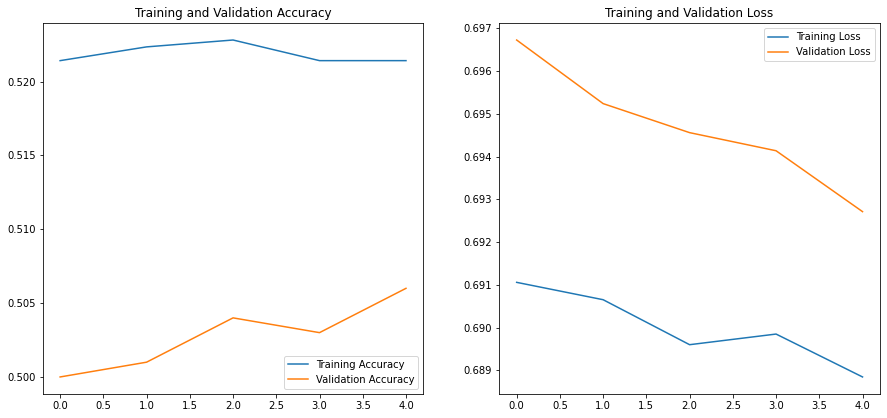

In [ ]:
show_learning_graph(history=history, epochs=epochs, verbose=0)

In [9]:
predictions = cnn.predict(validation_set)
predictions[:15]

63/63 [==============================] - 6s 91ms/step


array([[0.5310216 ],
       [0.54501414],
       [0.51887214],
       [0.5190675 ],
       [0.54145163],
       [0.5293126 ],
       [0.52484566],
       [0.5159291 ],
       [0.53316617],
       [0.5167626 ],
       [0.5022845 ],
       [0.52685344],
       [0.4948604 ],
       [0.52505577],
       [0.53682977]], dtype=float32)

In [10]:
predictions = cnn.predict(validation_set)
predictions[:15]

63/63 [==============================] - 5s 86ms/step


array([[0.54392034],
       [0.5261447 ],
       [0.5331257 ],
       [0.5390789 ],
       [0.5292545 ],
       [0.5366633 ],
       [0.5558979 ],
       [0.5459883 ],
       [0.5426021 ],
       [0.51774216],
       [0.5353673 ],
       [0.5319681 ],
       [0.516269  ],
       [0.5298339 ],
       [0.5199816 ]], dtype=float32)

In [11]:
predictions[-15:-1]

array([[0.5405346 ],
       [0.51514447],
       [0.54056174],
       [0.53324395],
       [0.5537846 ],
       [0.529154  ],
       [0.5404721 ],
       [0.5352235 ],
       [0.53222936],
       [0.5347294 ],
       [0.53104925],
       [0.5414761 ],
       [0.5184457 ],
       [0.51894355]], dtype=float32)

In [12]:
img_test = r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg'

img = keras.preprocessing.image.load_img(img_test, target_size=(64,64))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = cnn.predict(img_array)
score = predictions[0]
print(f"- {100 * (1 - score)} % cat / {100 * score} % dog, expected : dog")
print(predictions)

1/1 [==============================] - 0s 61ms/step
- [0.] % cat / [100.] % dog, expected : dog
[[1.]]


In [13]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [14]:
labels = list(training_set.class_indices.keys())
labels

['cat', 'dog']

In [15]:
def get_aurelie_test():
    aurelie_test = [r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (23).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (75).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (113).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (115).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (473).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (702).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (719).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (808).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (825).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (902).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\cat_dog.001 (721).jpg',
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (1).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (16).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (18).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (32).jpg']

    aurelie_y = [1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,0, 0, 0, 0]
    return aurelie_test, aurelie_y 

In [16]:
aurelie_test = [r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (32).jpg']
aurelie_y = [1,0]

1/1 [==============================] - 0s 20ms/step
[[1.]]


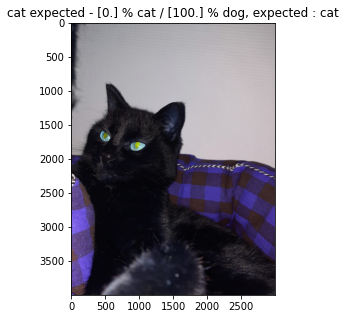

In [17]:
success = 0
fail = 0
fail_files = []
fail_predictions = []


for i in range(0, len(aurelie_test)):
    try:
        img = keras.preprocessing.image.load_img(aurelie_test[i], target_size=(64,64))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis

        predictions = cnn.predict(img_array)
        score = predictions[0]

        res = 0
        if (1-score) < score:
            res = 1

        label = aurelie_y[i]

        if label == res:
            success += 1
        else:
            print(predictions)
            fail += 1
            fail_files.append(aurelie_test[i])
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.imread(aurelie_test[i]))
            # plt.title(f"{labels[label]} expected - {predictions[i]}")
            # print(f"- {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.title(f"{labels[label]} expected - {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.show()
    except Exception as e:
        print(i, aurelie_test[i], e)

In [18]:
success = 0
fail = 0
fail_files = []
fail_predictions = []

filenames = get_dir_files(dir_path="aurelie_set", include_sub_dir=1, verbose=0)

for i in range(0, len(filenames)):
    try:
        img = keras.preprocessing.image.load_img(filenames[i], target_size=(64,64))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis

        predictions = cnn.predict(img_array)
        score = predictions[0]

        res = 0
        if (1-score) < score:
            res = 1

        label = aurelie_y[i]

        if label == res:
            success += 1
        else:
            print(predictions)
            fail += 1
            fail_files.append(aurelie_test[i])
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.imread(aurelie_test[i]))
            plt.title(f"{labels[label]} expected - {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.show()
    except Exception as e:
        print(filenames[i], e)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'aurelie_set'

In [ ]:
res_aur_set = cnn.predict(aurelie_set_validation)
res_aur_set

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000022B57EE46D0>

In [53]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


1/1 [==============================] - 0s 20ms/step
[[1.]]


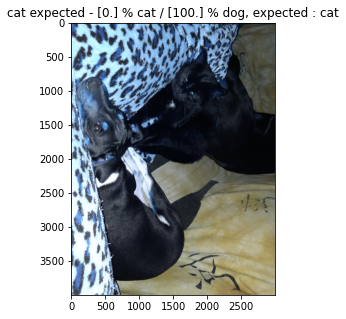

cannot identify image file <_io.BytesIO object at 0x0000022B57EE4630>
1/1 [==============================] - 0s 91ms/step
[[1.]]


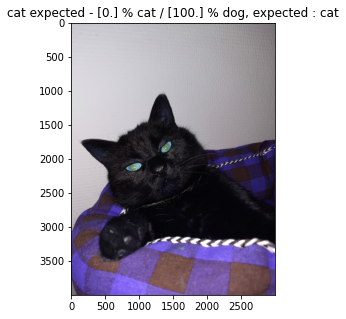

1/1 [==============================] - 0s 25ms/step
[[1.]]


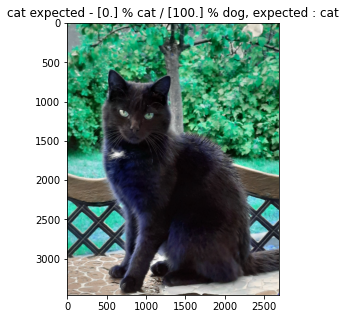

1/1 [==============================] - 0s 23ms/step
[[1.]]


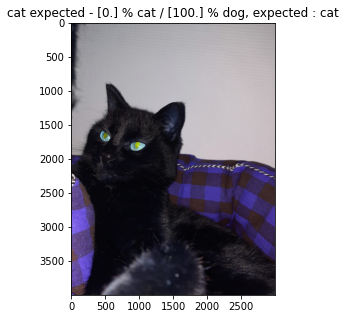

In [ ]:
success = 0
fail = 0
fail_files = []
fail_predictions = []

filenames = get_dir_files(dir_path="validation_set", include_sub_dir=1, verbose=0)

for i in range(0, len(filenames)):
    try:
        img = keras.preprocessing.image.load_img(filenames[i], target_size=(64,64))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Create batch axis

        predictions = cnn.predict(img_array)
        score = predictions[0]

        res = 0
        if (1-score) < score:
            res = 1

        label = aurelie_y[i]

        if label == res:
            success += 1
        else:
            print(predictions)
            fail += 1
            fail_files.append(aurelie_test[i])
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.imread(aurelie_test[i]))
            plt.title(f"{labels[label]} expected - {100 * (1 - score)} % cat / {100 * score} % dog, expected : {labels[aurelie_y[i]]}")
            plt.show()
    except Exception as e:

        print(filenames[i], e)

In [25]:
predictions_reshape = predictions.reshape(1,-1)[0]
predictions_reshape

array([0.4488082 , 0.42749956, 0.417328  , ..., 0.40269837, 0.38880864,
       0.46218938], dtype=float32)

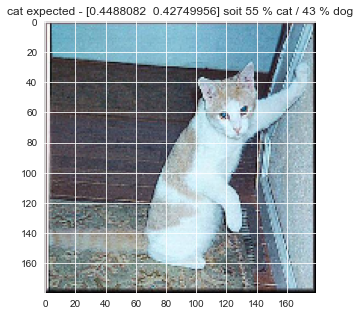

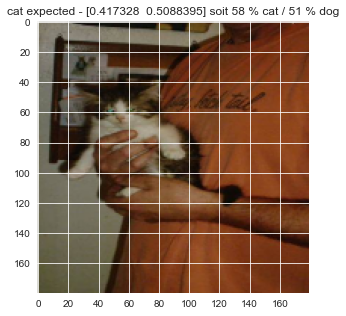

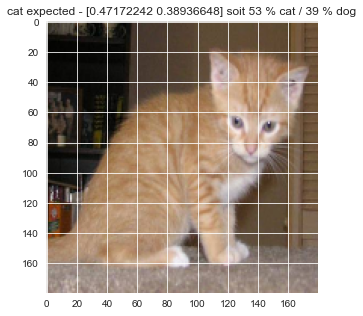

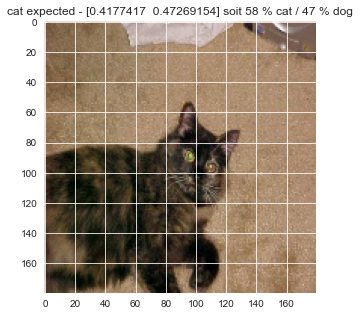

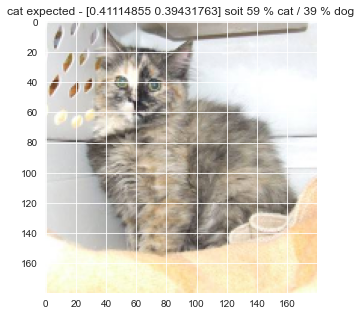

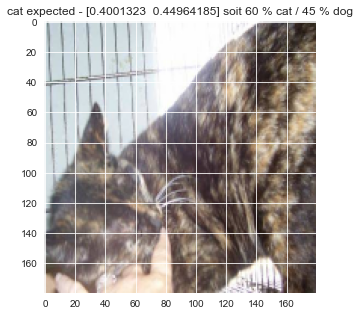

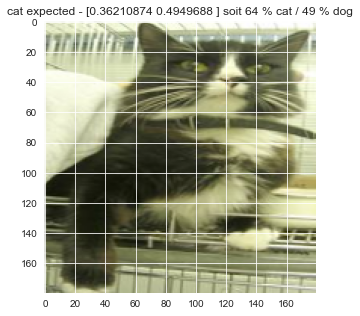

KeyboardInterrupt: 

<Figure size 360x360 with 0 Axes>

In [41]:
success = 0
fail = 0
fail_files = []
fail_predictions = []

for i in range(0, len(predictions)):
    score = predictions[i]
    
    res = 0
    if predictions[i][0] < predictions[i][1]:
        res = 1
    
    feature, label = val[i]

    if label == res:
        success += 1
    else:
        fail += 1
        fail_files.append(feature)
    plt.figure(figsize=(5, 5))
    plt.imshow(feature)
    plt.title(f"{labels[label]} expected - {predictions[i]}")
    # plt.title(f"{labels[label]} expected - {predictions[i]} soit {round(100 * (1 - predictions[i][0]))} % cat / {round(100 * predictions[i][1])} % dog")
    plt.show()
    # print(predictions)

In [30]:
for i in range(0, len(predictions)):
    score = predictions[i]
    # print(f'{predictions[i]}, expected : {labels[y_val[i]]}')
    print(f"- {round(100 * (1 - predictions[i][0]))} % cat / {round(100 * predictions[i][1])} % dog, expected : {labels[y_val[i]]}")
    # print(predictions)

- 55 % cat / 43 % dog, expected : cat
- 58 % cat / 51 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 58 % cat / 47 % dog, expected : cat
- 59 % cat / 39 % dog, expected : cat
- 60 % cat / 45 % dog, expected : cat
- 64 % cat / 49 % dog, expected : cat
- 58 % cat / 49 % dog, expected : cat
- 63 % cat / 50 % dog, expected : cat
- 56 % cat / 44 % dog, expected : cat
- 57 % cat / 37 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 56 % cat / 45 % dog, expected : cat
- 58 % cat / 38 % dog, expected : cat
- 58 % cat / 48 % dog, expected : cat
- 53 % cat / 39 % dog, expected : cat
- 57 % cat / 46 % dog, expected : cat
- 52 % cat / 37 % dog, expected : cat
- 58 % cat / 44 % dog, expected : cat
- 56 % cat / 47 % dog, expected : cat
- 57 % cat / 42 % dog, expected : cat
- 55 % cat / 44 % dog, expected : cat
- 55 % cat / 47 % dog, expected : cat
- 63 % cat / 50 % dog, expected : cat
- 57 % cat / 46 % dog, expected : cat
- 57 % cat / 48 % dog, expected : cat
- 60 % cat /

In [27]:
print(classification_report(y_val, predictions, target_names = ['Cat (Class 0)','Dog (Class 1)']))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

<div style="display: flex; background-color: Green; padding: 7px;" >

### Test on new data
</div>

In [ ]:
def get_cv2_data(data_path, labels, image_size = (180, 180), filenames=None, verbose=0):
    data = [] 

    if filenames is None:
        filenames = get_dir_files(dir_path=data_path, include_sub_dir=1, verbose=verbose-1)

    if data_path is None:
        data_path = ""

    for f_name in filenames:

        try:
            img_arr = cv2.imread(join(data_path, f_name))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, image_size) # Reshaping images to preferred size
            
            # Affectation de la catégorie en se basant sur le nom du fichier
            cat = 0
            category=f_name.split('\\')[-1]
            category=category.split('.')[0]
            # On affecte le bon code de label
            for i in range(1, len(labels)):
                if labels[i] in category:
                    cat = i
                    break
            data.append([resized_arr, cat])
        except Exception as e:
            print(e)
    return np.array(data, dtype=object)

In [ ]:
def get_aurelie_test():
    aurelie_test = [r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (1).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (23).jpeg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (75).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (113).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (115).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (473).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (702).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (719).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (808).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (825).JPG', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\dog.001 (902).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\dog\cat_dog.001 (721)',
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (1)', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (16).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (18).jpg', 
    r'C:\Users\User\WORK\workspace-ia\PROJETS\projet_cat_or_dog\dataset\aurelie_validation_set\cat\cat.001 (32).jpg']

    aurelie_y = [1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,0, 0, 0, 0]
    return aurelie_test, aurelie_y 

In [ ]:
aurelie_test, aurelie_y = get_aurelie_test()

In [ ]:
aurelie_val = get_cv2_data(data_path="",filenames=aurelie_test, labels=labels, verbose=verbose)

aurelie_predictions = model.predict_classes(aurelie_val)
aurelie_predictions = aurelie_predictions.reshape(1,-1)[0]
print(classification_report(aurelie_y, aurelie_predictions, target_names = ['Cat (Class 0)','Dog (Class 1)']))